In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Getting Started


Notes to data: the used dataset consists out of an EEG measurement of mice. It shows 500 Timepoints (each 2 seconds long) and their corresponding power of the frequency from 0-25 Hz.
The data is staged with three vigilance states:
R = REM sleep //
NREM = NREM sleep //
W = Wake


## 1. Read Data

## using csv reader

In [20]:
df.head()

,EpochNo;Stage;;Time;0,000000Hz;0,500000Hz;1,000000Hz;1,500000Hz;2,000000Hz;2,500000Hz;3,000000Hz;3,500000Hz;4,000000Hz;4,...,500000Hz;21,000000Hz;21,500000Hz;22,000000Hz;22,500000Hz;23,000000Hz;23,500000Hz;24,000000Hz;24,500000Hz;25,000000Hz
0,1743;R;R;05.04.19 08:56;3,13E-06;0,000004535;1,32E-05;6,02E-07;1,86E-06;1,63E-05;0,000040165;5,53E-05;2,44E-05;0,...,51E-07;1,12E-06;1,19E-06;9,57E-07;1,70E-06;2,96E-06;4,20E-07;1,43E-06;0,000002384;2,0.000092
1,1744;R;R;05.04.19 08:56;0,000000702;2,85E-05;0,0001247;0,000272167;0,000194119;0,000138808;0,000192908;0,000182328;3,75E-05;9,...,59E-06;6,02E-08;2,29E-06;4,93E-07;2,16E-06;7,14E-07;2,32E-07;1,94E-06;2,85E-07;8,0.000006
2,1745;R;R;05.04.19 08:56;7,59E-08;8,10E-06;1,41E-05;7,62E-06;1,28E-05;6,99E-05;8,92E-05;0,000230536;9,03E-05;2,...,09E-06;3,39E-06;2,61E-06;1,48E-07;6,07E-07;1,75E-06;1,76E-06;6,77E-07;0,000001009;2,0.000006
3,1746;R;R;05.04.19 08:56;4,02E-05;1,58E-05;6,41E-07;8,74E-07;1,58E-05;1,61E-05;2,20E-05;6,01E-05;3,13E-05;3,...,54E-06;6,01E-07;1,60E-06;3,58E-06;1,40E-06;3,99E-06;0,000007427;7,29E-07;1,07E-06;9,0.000072
4,1747;R;R;05.04.19 08:56;1,89E-08;5,33E-06;2,11E-06;1,59E-05;2,39E-05;8,24E-06;4,98E-05;0,000107375;2,32E-05;5,...,32E-06;7,92E-06;6,61E-06;7,50E-06;9,37E-07;2,77E-07;0,000000752;9,57E-07;9,65E-07;1,0.000043


##  -> Reading error: strings instead of floats, wrong columns

## Alternative: Excel reader

In [56]:
conda install xlrd

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/ella/opt/anaconda3/envs/sleep

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.11.8          |   py37hecd8cb5_0         148 KB
    xlrd-1.2.0                 |           py37_0         175 KB
    ------------------------------------------------------------
                                           Total:         322 KB

The following NEW packages will be INSTALLED:

  xlrd               pkgs/main/osx-64::xlrd-1.2.0-py37_0

The following packages will be UPDATED:

  certifi            pkgs/main/noarch::certifi-2020.6.20-p~ --> pkgs/main/osx-64::certifi-2020.11.8-py37hecd8cb5_0



xlr

In [212]:
df_2= pd.read_excel("test EEG.xls")
df_2.head()

,EpochNo,Stage,Stage2,Time,"0,000000Hz","0,500000Hz","1,000000Hz","1,500000Hz","2,000000Hz","2,500000Hz",...,"20,500000Hz","21,000000Hz","21,500000Hz","22,000000Hz","22,500000Hz","23,000000Hz","23,500000Hz","24,000000Hz","24,500000Hz","25,000000Hz"
0,1743,R,R,2019-04-05 08:56:00,3.130000e-06,0.000005,1.320000e-05,6.020000e-07,0.000002,0.000016,...,6.510000e-07,1.120000e-06,0.000001,9.570000e-07,1.700000e-06,2.960000e-06,4.200000e-07,1.430000e-06,2.384000e-06,2.920000e-06
1,1744,R,R,2019-04-05 08:56:00,7.020000e-07,0.000029,1.247000e-04,2.721670e-04,0.000194,0.000139,...,2.590000e-06,6.020000e-08,0.000002,4.930000e-07,2.160000e-06,7.140000e-07,2.320000e-07,1.940000e-06,2.850000e-07,8.560000e-07
2,1745,R,R,2019-04-05 08:56:00,7.590000e-08,0.000008,1.410000e-05,7.620000e-06,0.000013,0.000070,...,4.090000e-06,3.390000e-06,0.000003,1.480000e-07,6.070000e-07,1.750000e-06,1.760000e-06,6.770000e-07,1.009000e-06,2.610000e-07
3,1746,R,R,2019-04-05 08:56:00,4.020000e-05,0.000016,6.410000e-07,8.740000e-07,0.000016,0.000016,...,1.540000e-06,6.010000e-07,0.000002,3.580000e-06,1.400000e-06,3.990000e-06,7.427000e-06,7.290000e-07,1.070000e-06,9.720000e-06
4,1747,R,R,2019-04-05 08:56:00,1.890000e-08,0.000005,2.110000e-06,1.590000e-05,0.000024,0.000008,...,9.320000e-06,7.920000e-06,0.000007,7.500000e-06,9.370000e-07,2.770000e-07,7.520000e-07,9.570000e-07,9.650000e-07,1.430000e-06


## -> correct reading of excel file - going ahead with excel-file-reader

# 2. From Column to graph
## Selecting rows and columns with data, no strings

In [213]:
df_3 = df_2.iloc[0:, 4:]
df_3.head()

,"0,000000Hz","0,500000Hz","1,000000Hz","1,500000Hz","2,000000Hz","2,500000Hz","3,000000Hz","3,500000Hz","4,000000Hz","4,500000Hz",...,"20,500000Hz","21,000000Hz","21,500000Hz","22,000000Hz","22,500000Hz","23,000000Hz","23,500000Hz","24,000000Hz","24,500000Hz","25,000000Hz"
0,3.130000e-06,0.000005,1.320000e-05,6.020000e-07,0.000002,0.000016,0.000040,0.000055,0.000024,0.000020,...,6.510000e-07,1.120000e-06,0.000001,9.570000e-07,1.700000e-06,2.960000e-06,4.200000e-07,1.430000e-06,2.384000e-06,2.920000e-06
1,7.020000e-07,0.000029,1.247000e-04,2.721670e-04,0.000194,0.000139,0.000193,0.000182,0.000037,0.000094,...,2.590000e-06,6.020000e-08,0.000002,4.930000e-07,2.160000e-06,7.140000e-07,2.320000e-07,1.940000e-06,2.850000e-07,8.560000e-07
2,7.590000e-08,0.000008,1.410000e-05,7.620000e-06,0.000013,0.000070,0.000089,0.000231,0.000090,0.000022,...,4.090000e-06,3.390000e-06,0.000003,1.480000e-07,6.070000e-07,1.750000e-06,1.760000e-06,6.770000e-07,1.009000e-06,2.610000e-07
3,4.020000e-05,0.000016,6.410000e-07,8.740000e-07,0.000016,0.000016,0.000022,0.000060,0.000031,0.000031,...,1.540000e-06,6.010000e-07,0.000002,3.580000e-06,1.400000e-06,3.990000e-06,7.427000e-06,7.290000e-07,1.070000e-06,9.720000e-06
4,1.890000e-08,0.000005,2.110000e-06,1.590000e-05,0.000024,0.000008,0.000050,0.000107,0.000023,0.000051,...,9.320000e-06,7.920000e-06,0.000007,7.500000e-06,9.370000e-07,2.770000e-07,7.520000e-07,9.570000e-07,9.650000e-07,1.430000e-06


## Rewrite in numpy array:

In [183]:
df_num2 = df_3.to_numpy()
df_num2.T.shape


(51, 497)

## Heatmap of data

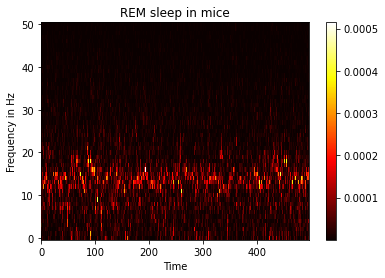

In [314]:
color_map = plt.imshow(df_num2.T, interpolation="nearest", aspect='auto')
plt.gca().invert_yaxis()

plt.xlabel('Time')
plt.ylabel('Frequency in Hz')
plt.title('REM sleep in mice')

color_map.set_cmap('hot')
plt.colorbar()


## -> Result: Power of EEG mainly at Frequency 6-8 Hz, which is typical for REM-sleep theta rhythm. 
    

# line plot of data

In [131]:
df_4 = df_2.iloc[1:, range(18,30,2)]
df_4.head()

,"7,000000Hz","8,000000Hz","9,000000Hz","10,000000Hz","11,000000Hz","12,000000Hz"
1,1.590000e-05,6.090000e-06,0.000009,0.000031,4.820000e-05,0.000019
2,1.547450e-04,1.420000e-05,0.000018,0.000082,6.180000e-07,0.000006
3,7.970000e-05,5.312300e-05,0.000002,0.000003,4.180000e-05,0.000029
4,4.900000e-07,6.850000e-07,0.000018,0.000009,2.780000e-06,0.000002
5,1.130000e-05,1.800000e-05,0.000003,0.000092,9.960000e-06,0.000002


In [186]:
df_num4 = df_4.to_numpy()
df_num4.shape

(497, 6)

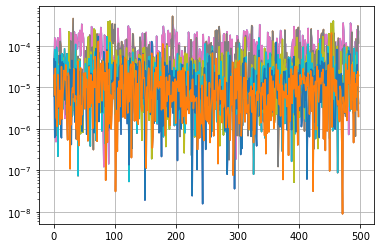

In [191]:
fig, ax = plt.subplots()
ax.plot(df_4)
ax.grid()
ax.semilogy(df_4)

## indistinct plot, because of too many timepoints and too many frequencies plotted in one graph - better only one Timepoint with all frequencies in one plot!

In [194]:
df_5 = df_2.iloc[1,4:]
df_5.head

<bound method NDFrame.head of 0,000000Hz        7.02e-07
0,500000Hz        2.85e-05
1,000000Hz       0.0001247
1,500000Hz     0.000272167
2,000000Hz     0.000194119
2,500000Hz     0.000138808
3,000000Hz     0.000192908
3,500000Hz     0.000182328
4,000000Hz        3.75e-05
4,500000Hz        9.38e-05
5,000000Hz     0.000124025
5,500000Hz     0.000105551
6,000000Hz     0.000221338
6,500000Hz        9.53e-05
7,000000Hz        1.59e-05
7,500000Hz        2.43e-06
8,000000Hz        6.09e-06
8,500000Hz        3.25e-06
9,000000Hz        9.39e-06
9,500000Hz        2.87e-05
10,000000Hz       3.08e-05
10,500000Hz       7.54e-05
11,000000Hz       4.82e-05
11,500000Hz       2.54e-06
12,000000Hz       1.95e-05
12,500000Hz        1.5e-05
13,000000Hz       1.74e-05
13,500000Hz     1.0185e-05
14,000000Hz          1e-05
14,500000Hz       1.95e-05
15,000000Hz       1.11e-05
15,500000Hz       6.74e-06
16,000000Hz       5.57e-06
16,500000Hz       4.62e-06
17,000000Hz       7.22e-06
17,500000Hz       2.27e-0

([<matplotlib.axis.XTick at 0x7febc2608c90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

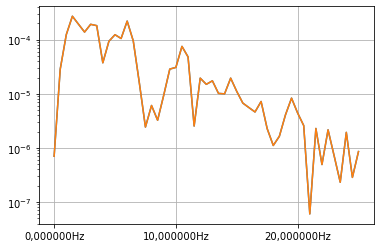

In [205]:
fig, ax = plt.subplots()
ax.plot(df_5)
ax.grid()
ax.semilogy(df_5)
plt.xticks(np.arange(0,50,step=20))

## -> At this timepoint (2019-04-05 08:56:00) the Power of Frequency is high at low Frequency (0-7 Hz) - it is not typical for REM-sleep

# 3D Plot

In [141]:
from mpl_toolkits.mplot3d import Axes3D

In [230]:
df_3.head()

,"0,000000Hz","0,500000Hz","1,000000Hz","1,500000Hz","2,000000Hz","2,500000Hz","3,000000Hz","3,500000Hz","4,000000Hz","4,500000Hz",...,"20,500000Hz","21,000000Hz","21,500000Hz","22,000000Hz","22,500000Hz","23,000000Hz","23,500000Hz","24,000000Hz","24,500000Hz","25,000000Hz"
0,3.130000e-06,0.000005,1.320000e-05,6.020000e-07,0.000002,0.000016,0.000040,0.000055,0.000024,0.000020,...,6.510000e-07,1.120000e-06,0.000001,9.570000e-07,1.700000e-06,2.960000e-06,4.200000e-07,1.430000e-06,2.384000e-06,2.920000e-06
1,7.020000e-07,0.000029,1.247000e-04,2.721670e-04,0.000194,0.000139,0.000193,0.000182,0.000037,0.000094,...,2.590000e-06,6.020000e-08,0.000002,4.930000e-07,2.160000e-06,7.140000e-07,2.320000e-07,1.940000e-06,2.850000e-07,8.560000e-07
2,7.590000e-08,0.000008,1.410000e-05,7.620000e-06,0.000013,0.000070,0.000089,0.000231,0.000090,0.000022,...,4.090000e-06,3.390000e-06,0.000003,1.480000e-07,6.070000e-07,1.750000e-06,1.760000e-06,6.770000e-07,1.009000e-06,2.610000e-07
3,4.020000e-05,0.000016,6.410000e-07,8.740000e-07,0.000016,0.000016,0.000022,0.000060,0.000031,0.000031,...,1.540000e-06,6.010000e-07,0.000002,3.580000e-06,1.400000e-06,3.990000e-06,7.427000e-06,7.290000e-07,1.070000e-06,9.720000e-06
4,1.890000e-08,0.000005,2.110000e-06,1.590000e-05,0.000024,0.000008,0.000050,0.000107,0.000023,0.000051,...,9.320000e-06,7.920000e-06,0.000007,7.500000e-06,9.370000e-07,2.770000e-07,7.520000e-07,9.570000e-07,9.650000e-07,1.430000e-06


In [277]:
time = np.linspace(1,df_3.shape[0],(df_3.shape[0]))
time

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [290]:
freq = np.arange(0,25.5,0.5)
freq

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ])

In [294]:
df_3.shape

(498, 51)

In [295]:

Y.shape


(51, 498)

In [292]:
X.shape

(51, 498)

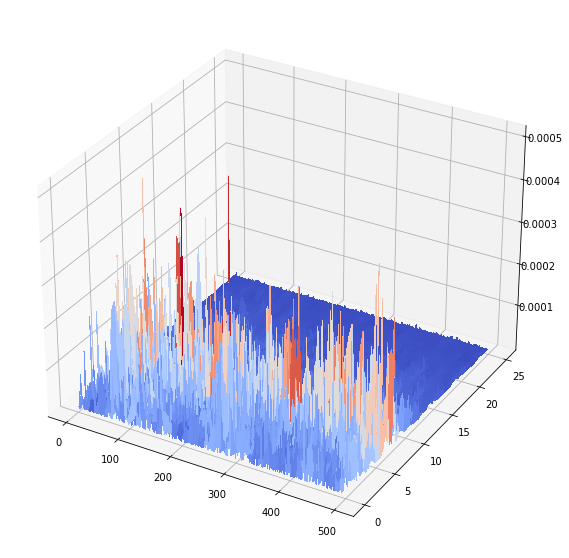

In [307]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes(projection='3d')
X = time
Y = freq
X, Y = np.meshgrid(X, Y)
Z = df_3.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.show()

## -> As in the Heatmap you can see the highest power at 6-10 Hz, which is typical for theta rhythm and the corresponding REM-sleep.

# The End